# thickness GT处理

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [61]:
thickness = np.load('./data/THuman2.0_Release/0001/thickness_silhouette.npy')

In [62]:
avg = np.mean(thickness[thickness != 0])
print("avg = ",avg)

avg =  0.58245164


原始thickness
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


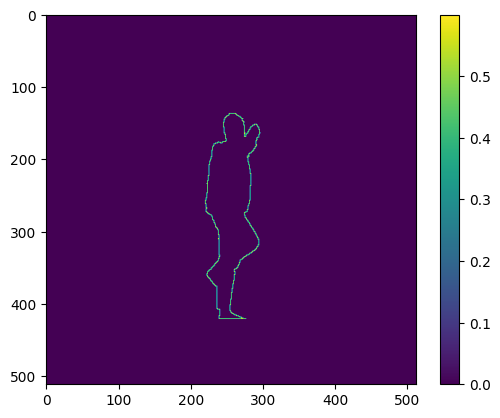

In [63]:
print("原始thickness\n",thickness)
plt.imshow(thickness)
plt.colorbar()
plt.show()

# 开始尝试

【条件】我有一个(512,512)的numpy数组，表示一个图像。这个图像中间有一个大小不确定的不规则形状的封闭区域，其轮廓位置的值非0且每个位置的值可能不等，整个numpy中，除了轮廓位置之外的其余所有值都为0.


【任务】现在我想在这个封闭区域内涂色，使得区域内的颜色与其距离最近的轮廓处的值相等。


【我的思路】对图像中的每个像素位置进行遍历，按照半径r从0到50进行循环判断：在以当前位置为圆心、半径r的圆之内是否存在不为0的值：若存在一个，则把这个值赋给当前位置，循环结束，进行下一个像素的遍历；若存在多个，则把它们的平均值赋给当前位置，循环结束，进行下一个像素的遍历。一直到所有像素都遍历结束

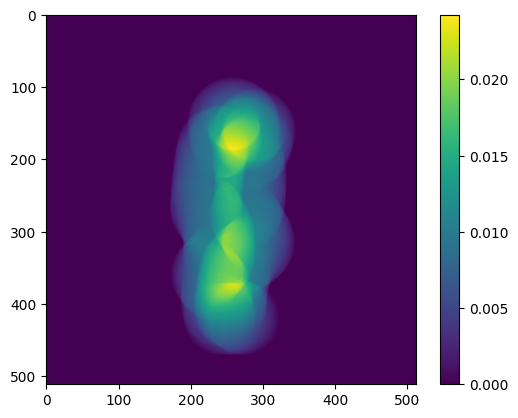

In [64]:
filled_thickness = thickness.copy()

# 定义一个函数来创建圆形掩码
def circle(h, w, center=None, radius=None):
    if center is None:  # 默认为图像中心
        center = (int(w/2), int(h/2))
    if radius is None:  # 默认为图像宽度的1/4
        radius = min(center[0], center[1], w-center[0], h-center[1])
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    mask = dist_from_center <= radius
    return mask

def process_image(img):
    result = np.zeros_like(img)  # 创建一个和原图像大小相同的数组来存储处理后的结果
    for i in range(img.shape[0]):  # 遍历图像的每个像素位置
        for j in range(img.shape[1]): 
            neighborhood = circle(img.shape[0], img.shape[1], center=(j, i), radius=50)
            nonzero_values = img[neighborhood != 0]  # 获取圆区域内的值
            if len(nonzero_values) > 0:  # 如果存在不为0的值
                result[i, j] = np.mean(nonzero_values)  # 对当前位置进行赋值
    return result

filled_image = process_image(filled_thickness)
plt.imshow(filled_image)  # 用viridis颜色图来显示距离
plt.colorbar()
plt.show()

In [57]:
print(np.max(filled_image))
print(np.mean(filled_image[filled_image>0.0001]))

0.047490217
0.015227812


/data/home/wuxiaotao/miniconda3/envs/pcn/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/data/home/wuxiaotao/miniconda3/envs/pcn/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/data/home/wuxiaotao/miniconda3/envs/pcn/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/data/home/wuxiaotao/miniconda3/envs/pcn/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/data/home/wuxiaotao/miniconda3/envs/pcn/lib/python3.7/site-packages/IPython/core/pylabt

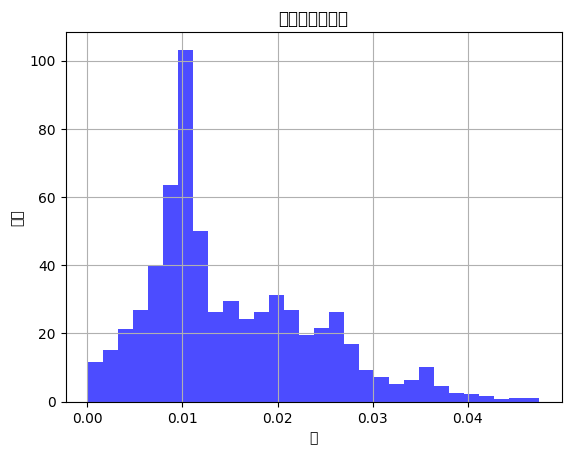

In [60]:
plt.hist(filled_image[filled_image>0.0001].flatten(), bins=30, density=True, alpha=0.7, color='b')
plt.title('值的分布直方图')
plt.xlabel('值')
plt.ylabel('频率')
plt.grid(True)
plt.show()

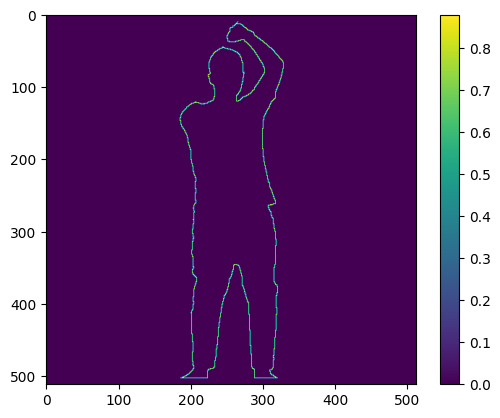

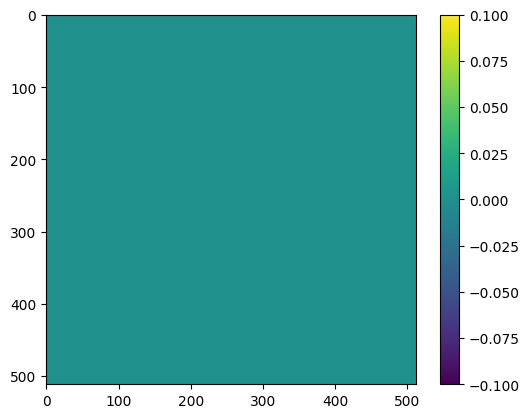

In [51]:
img = filled_thickness.copy()
plt.imshow(img)
plt.colorbar()
plt.show()
result = np.zeros_like(img)  # 创建一个和原图像大小相同的数组来存储处理后的结果
    
neighborhood = circle(img.shape[0], img.shape[1], center=(40, 250), radius=60)
nonzero_values = img[neighborhood != 0]  # 获取圆区域内的值
if len(nonzero_values) > 0:  # 如果存在不为0的值
    result[40, 250] = np.mean(nonzero_values)  # 对当前位置进行赋值

plt.imshow(result)
plt.colorbar()
plt.show()

In [24]:
filled_image[filled_image!=0]

array([0.00022086, 0.00153698, 0.0037165 , ..., 0.00086199, 0.00043386,
       0.00021942], dtype=float32)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


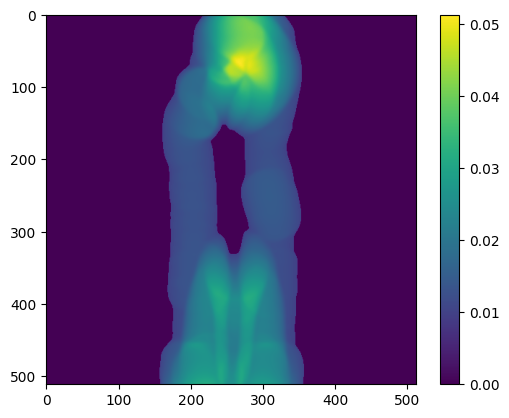

In [45]:
from scipy import ndimage
# 使用高斯滤波器对图像进行平滑处理
smoothed_image = ndimage.gaussian_filter(filled_image, sigma=2)
tmp = smoothed_image
tmp[tmp<0.01]=0
print(tmp)
plt.imshow(tmp)
plt.colorbar()
plt.show()


In [55]:
np.max(tmp)

0.051291306

### 插值填充

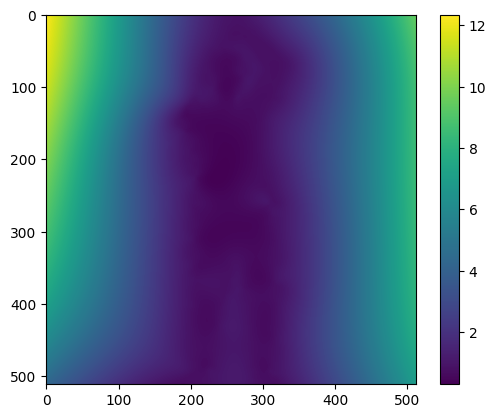

In [5]:
from scipy import interpolate

# create a copy of the original thickness array
filled_thickness = thickness.copy()

# create a 2D grid of indices for the non-zero elements
x, y = np.meshgrid(np.arange(thickness.shape[1]), np.arange(thickness.shape[0]))
points = np.array((x[thickness != 0], y[thickness != 0])).T

# create a 1D array of values for the non-zero elements
values = thickness[thickness != 0]

# create a 2D interpolation function
interp_func = interpolate.Rbf(points[:,0], points[:,1], values, function='cubic')

# create a 2D grid of indices for all elements
x_new, y_new = np.meshgrid(np.arange(thickness.shape[1]), np.arange(thickness.shape[0]))
points_new = np.array((x_new.ravel(), y_new.ravel())).T

# interpolate the missing values
filled_values = interp_func(points_new[:,0], points_new[:,1]).reshape(thickness.shape)

# replace the missing values with the interpolated values
filled_thickness[thickness == 0] = filled_values[thickness == 0]


plt.imshow(filled_thickness)
plt.colorbar()
plt.show()

### 机械填充

In [ ]:
# create a copy of the original thickness array
new_thickness = thickness.copy()

# iterate over each pixel in the array
for i in range(1, thickness.shape[0]-1):
    for j in range(1, thickness.shape[1]-1):
        # check if the current pixel is not 0 and the boundary pixel is 0
        if thickness[i][j] != 0 and (thickness[i-1][j] == 0 or thickness[i+1][j] == 0 or thickness[i][j-1] == 0 or thickness[i][j+1] == 0):
            # put the boundaries same as this pixel
            # new_thickness[i-1:i+2, j-1:j+2] = thickness[i][j]
            new_thickness[i, j-4:j+5] = thickness[i][j]

# display the updated image
plt.imshow(new_thickness)
plt.colorbar()
plt.show()


# 用网络预测

In [ ]:
# hyper-parameters
device = "cuda:6"
in_dim = 2
decay = 0.99
type = 5
item = 0000

In [1]:
import os
import random
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt
# from torch.utils.data.dataloader import DataLoader
# from dataset.thickness_data import thickness_loader
# from dataset.thuman import thuman
# from models.thickness_net import thickness_Autoencoder
import torchvision.transforms as transforms
from models.thickness_net import thickness_Autoencoder


In [2]:
model = thickness_Autoencoder(in_dim = in_dim, decay=decay, type=type).to(device)
ckpt = torch.load(f"./log/thickness_{type}/checkpoints/best_val.pth")
ckpt = { k.replace("module.",""):v for k,v in ckpt.items()}
model.load_state_dict(ckpt)
model.eval()

thickness_Autoencoder(
  (vq): VectorQuantizerEMA(
    (_embedding): Embedding(512, 64)
  )
  (encoder): Encoder_5(
    (conv1): Conv2d(2, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (decoder): Decoder(
    (deconv1): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (deconv2): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (deconv3): ConvTranspose2d(32, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  )
)

In [7]:
depth_F_path = "./data/THuman2.0_Release/{item}/depth_F.png"
depth_B_path = "./data/THuman2.0_Release/{item}/depth_B.png"
thickness_path = "./data/THuman2.0_Release/{item}/thickness_silhouette.npy"

depth_F = Image.open(depth_F_path).convert('L')
depth_B = Image.open(depth_B_path).convert('L')
thickness = np.load(thickness_path)

# avg = np.mean(thickness[thickness != 0])
# thickness[thickness == 0 ] = avg

transform = transforms.Compose([transforms.ToTensor()])
depth_F = transform(depth_F)
# mode_value, count = torch.mode(depth_F)
# depth_F[depth_F==mode_value]=torch.mean(depth_F[depth_F!=mode_value])
depth_B = transform(depth_B)
# mode_value, count = torch.mode(depth_B)
# depth_B[depth_B==mode_value]=torch.mean(depth_B[depth_B!=mode_value])
thickness =transform(thickness)


In [10]:
depth_F.shape

torch.Size([1, 1, 512, 512])

In [9]:
depth_F = depth_F.unsqueeze(1).to(device)
depth_B = depth_B.unsqueeze(1).to(device)
# rendered = rendered.to(device)
# input_data = torch.cat((depth_F, depth_B, rendered), dim=1)
input_data = torch.cat((depth_F, depth_B), dim=1)
thickness = thickness.to(device).unsqueeze(1)

In [11]:
pred = model(input_data)

tensor([[[[0.5656, 0.5688, 0.5660,  ..., 0.5040, 0.4585, 0.4426],
          [0.5834, 0.5683, 0.5902,  ..., 0.5404, 0.4898, 0.4553],
          [0.5794, 0.5972, 0.6051,  ..., 0.5392, 0.5136, 0.4781],
          ...,
          [0.6263, 0.6111, 0.6035,  ..., 0.5805, 0.5300, 0.4737],
          [0.5517, 0.5664, 0.5659,  ..., 0.5420, 0.4922, 0.4557],
          [0.5012, 0.5089, 0.4757,  ..., 0.5062, 0.4635, 0.4460]]]],
       device='cuda:6', grad_fn=<SlowConvTranspose2DBackward>)


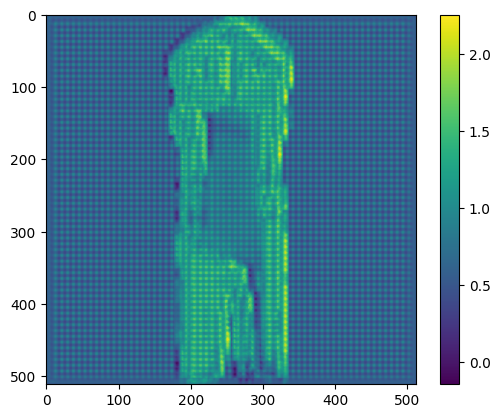

In [13]:
print(pred)
plt.imshow(pred[0,0].cpu().detach().numpy())
plt.colorbar()
plt.show()

# 一些工具函数的测试

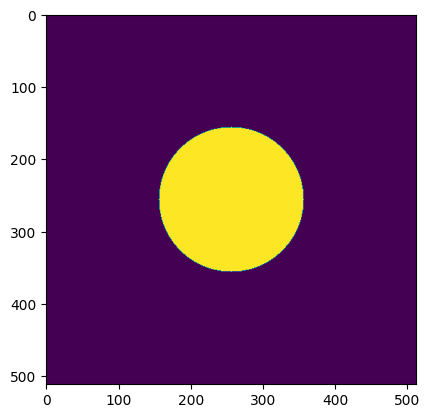

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# 定义一个函数来创建圆形掩码
def create_circular_mask(h, w, center=None, radius=None):
    if center is None:  # 默认为图像中心
        center = (int(w/2), int(h/2))
    if radius is None:  # 默认为图像宽度的1/4
        radius = min(center[0], center[1], w-center[0], h-center[1])
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    mask = dist_from_center <= radius
    return mask

# 创建一个示例的图像数据
image = np.zeros((512, 512))
image[200:300, 200:300] = 255  # 在图像中心创建一个方形区域

# 创建圆形掩码
mask = create_circular_mask(image.shape[0], image.shape[1], center=(256, 256), radius=100)

# 将圆形掩码应用到图像数据上
image[mask] = 128  # 将圆形区域赋值为中间灰色

# 使用plt.imshow显示图像
plt.imshow(image)
plt.show()